##Preparation

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Importing

In [92]:
lung_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Internship/Unified/lung_cancer/Lung Cancer/dataset_med.csv')
lung_data.info()
lung_data.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
378776,378777,52.0,Male,Romania,2024-05-21,Stage IV,Yes,Passive Smoker,20.6,192,0,0,0,0,Chemotherapy,2024-12-13,0
562108,562109,45.0,Female,Lithuania,2022-06-30,Stage III,No,Former Smoker,41.8,276,1,1,1,0,Chemotherapy,2023-05-11,0
475807,475808,56.0,Male,Czech Republic,2014-06-12,Stage II,Yes,Current Smoker,34.4,267,1,1,1,0,Chemotherapy,2015-09-29,0


In [93]:
lung_data['survived'].value_counts()

,count
survived,
0,693996
1,196004


In [94]:
lung_data._get_numeric_data().columns

Index(['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'survived'],
      dtype='object')

In [95]:
lung_data.select_dtypes(['category', 'object']).columns

Index(['gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history',
       'smoking_status', 'treatment_type', 'end_treatment_date'],
      dtype='object')

##Data Preprocessing

In [96]:
lung_data[['diagnosis_date', 'end_treatment_date']]

,diagnosis_date,end_treatment_date
0,2016-04-05,2017-09-10
1,2023-04-20,2024-06-17
2,2023-04-05,2024-04-09
3,2016-02-05,2017-04-23
4,2023-11-29,2025-01-08
...,...,...
889995,2022-07-01,2023-02-23
889996,2015-09-27,2017-06-19
889997,2016-03-27,2017-01-23
889998,2015-12-22,2017-12-12


In [97]:
lung_data['start_date'] = pd.to_datetime(lung_data['diagnosis_date'])
lung_data['end_date'] = pd.to_datetime(lung_data['end_treatment_date'])
lung_data['duration_day'] = np.abs((lung_data['start_date'] - lung_data['end_date']).dt.days)
lung_data['duration_day'].sample(3)

,duration_day
112190,486
753905,628
778700,397


In [98]:
lung_data['smoking_status'].value_counts()

,count
smoking_status,
Passive Smoker,223170
Never Smoked,222751
Former Smoker,222181
Current Smoker,221898


In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#gender_encoder (Male = 1, Female = 0)
gender_mapping = {"Male":1, "Female":0}
lung_data['gender_encoded'] = lung_data['gender'].map(gender_mapping)

#cancer_stage (I = 1, II = 2, so on)
stage_mapping = {"Stage I":1, "Stage II":2, "Stage III":3, "Stage IV":4}
lung_data['cancer_stage_encoded'] = lung_data['cancer_stage'].map(stage_mapping)
lung_data['cancer_stage_encoded']

#family_history using label encoder (Yes = 1, No = 0)
lung_data['family_history_encoded'] = le.fit_transform(lung_data['family_history'])
lung_data['family_history_encoded']

#smoking_status (Never = 0, Passive = 1, Current = 2, Former = 3)
status_mapping = {"Never Smoked":0, "Passive Smoker":1, "Current Smoker":2, "Former Smoker":3}
lung_data['smoking_status_encoded'] = lung_data['smoking_status'].map(status_mapping)

#treatment_type (Chemotherapy = 0, Surgery = 1, Combined = 2, Radiation = 3)
treat_mapping = {"Chemotherapy":0, "Surgery":1, "Combined":2, "Radiation":3}
lung_data['treatment_type_encoded'] = lung_data['treatment_type'].map(treat_mapping)

#cleaned_dataset (remove categorical data)
lung_dataset = lung_data.drop(['gender', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type', 'diagnosis_date', 'end_treatment_date'], axis = 1)

lung_dataset.info()
lung_dataset.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      890000 non-null  int64         
 1   age                     890000 non-null  float64       
 2   country                 890000 non-null  object        
 3   bmi                     890000 non-null  float64       
 4   cholesterol_level       890000 non-null  int64         
 5   hypertension            890000 non-null  int64         
 6   asthma                  890000 non-null  int64         
 7   cirrhosis               890000 non-null  int64         
 8   other_cancer            890000 non-null  int64         
 9   survived                890000 non-null  int64         
 10  start_date              890000 non-null  datetime64[ns]
 11  end_date                890000 non-null  datetime64[ns]
 12  duration_day            890000

,id,age,country,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,start_date,end_date,duration_day,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
90635,90636,50.0,Czech Republic,37.5,244,1,0,0,1,0,2020-12-07,2022-06-24,564,0,1,0,3,1
177866,177867,64.0,Romania,24.4,235,1,1,1,0,0,2022-10-05,2023-09-26,356,1,4,1,1,1
180018,180019,59.0,Netherlands,18.5,156,1,0,0,0,0,2023-02-01,2023-12-28,330,1,2,1,1,0
332648,332649,59.0,Croatia,34.4,272,1,1,1,0,0,2018-01-03,2018-07-09,187,1,4,0,0,3
660186,660187,58.0,Luxembourg,38.6,281,0,0,0,0,1,2020-02-07,2021-07-13,522,1,1,1,3,2
213859,213860,35.0,France,21.9,185,1,0,0,1,0,2018-12-21,2020-01-21,396,0,3,1,2,1
110098,110099,65.0,Ireland,40.0,252,1,0,0,1,0,2019-01-05,2020-09-17,621,1,2,1,2,3
343061,343062,63.0,Hungary,25.4,163,0,1,0,0,0,2022-01-10,2023-02-01,387,0,2,0,1,3
875196,875197,62.0,Spain,39.5,292,1,0,1,1,1,2015-01-11,2016-02-17,402,0,1,1,0,0
875946,875947,49.0,Spain,17.4,224,1,1,0,0,0,2016-12-31,2017-10-10,283,1,3,0,0,2


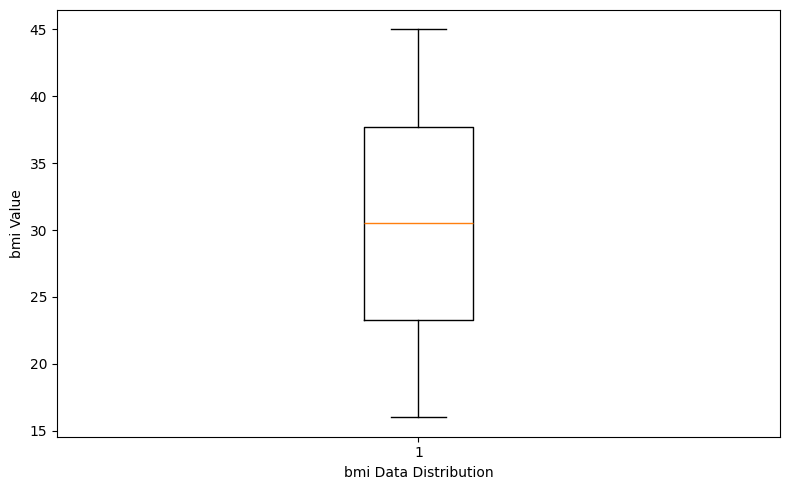

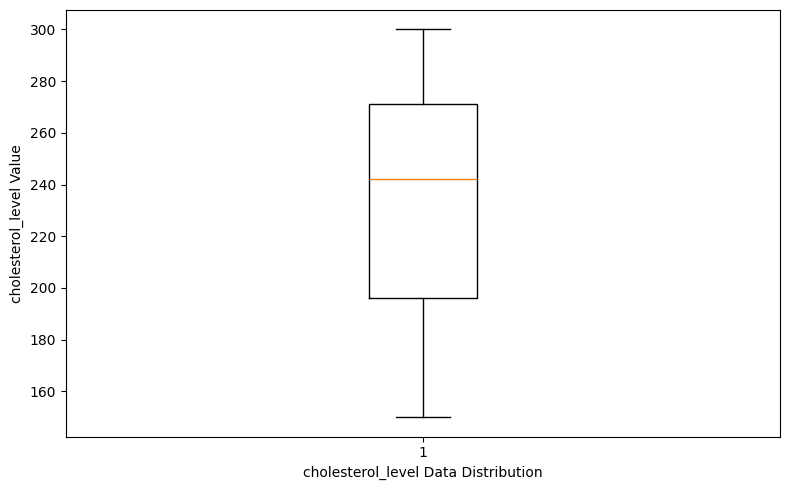

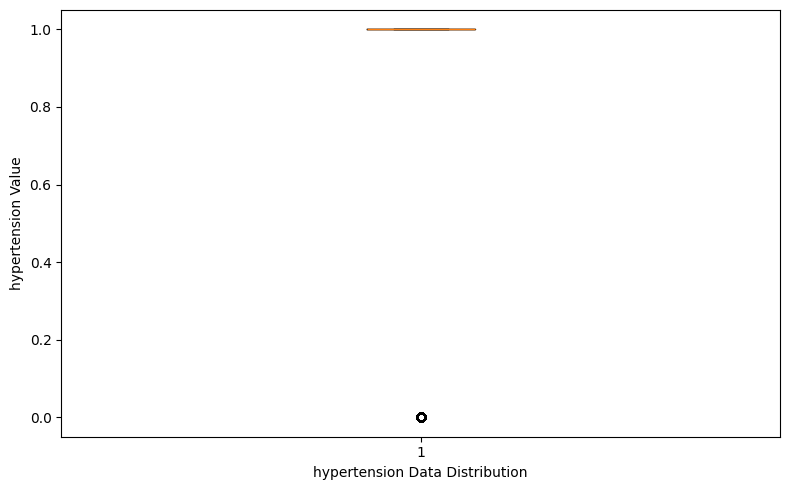

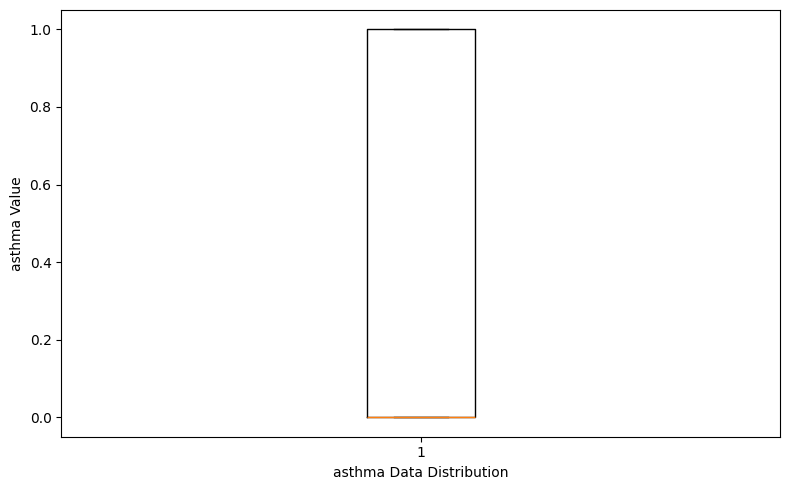

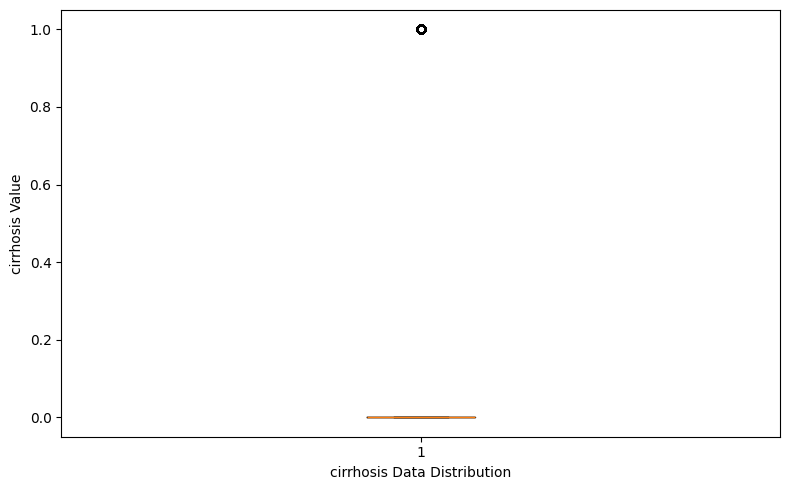

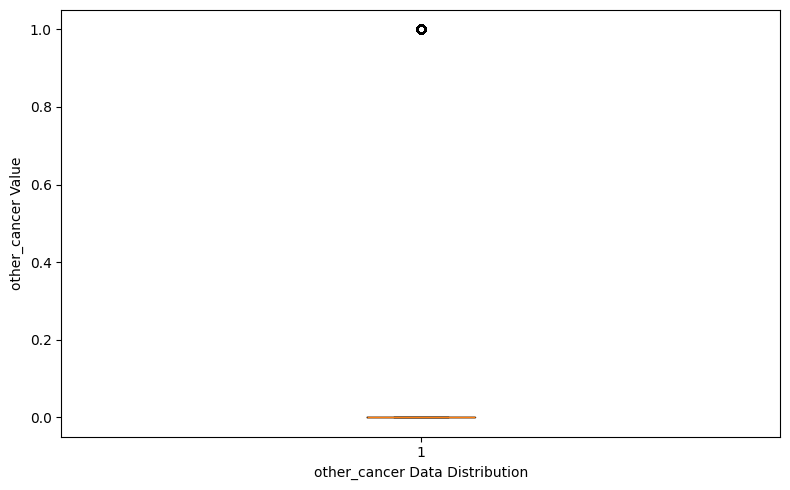

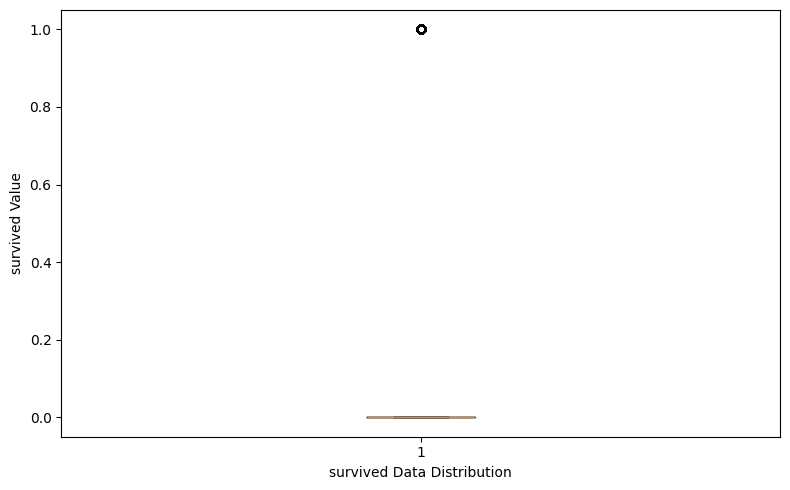

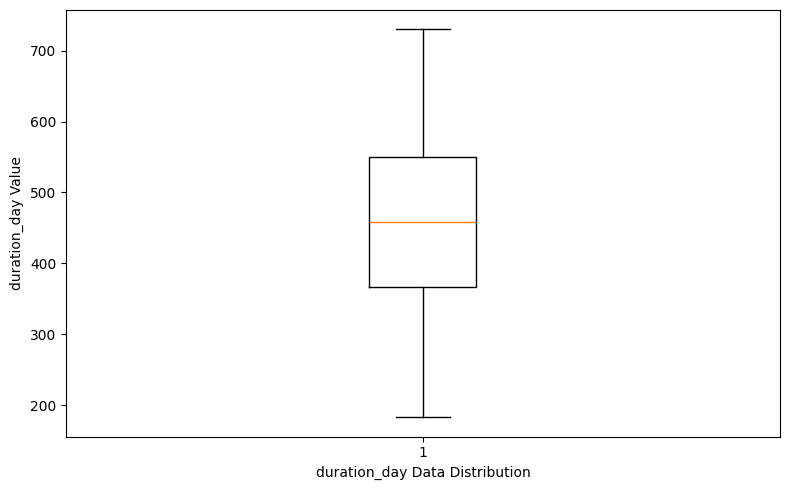

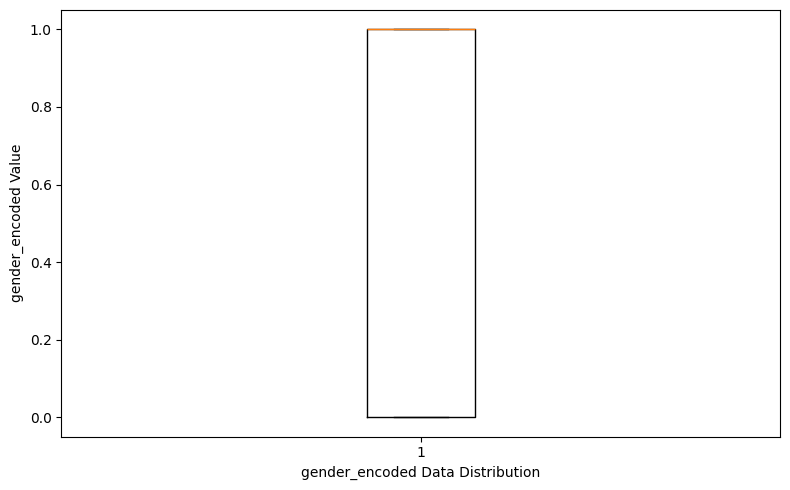

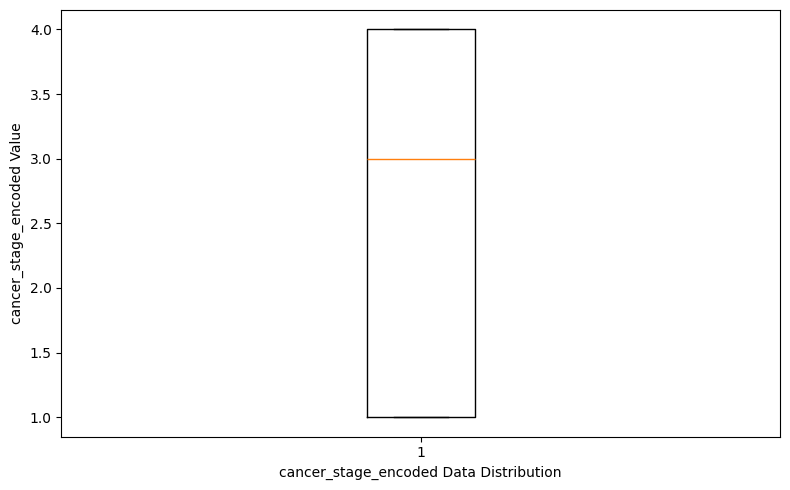

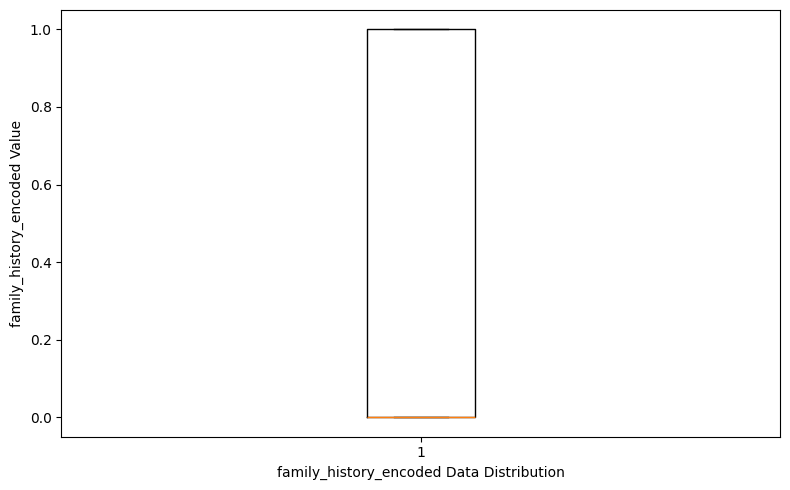

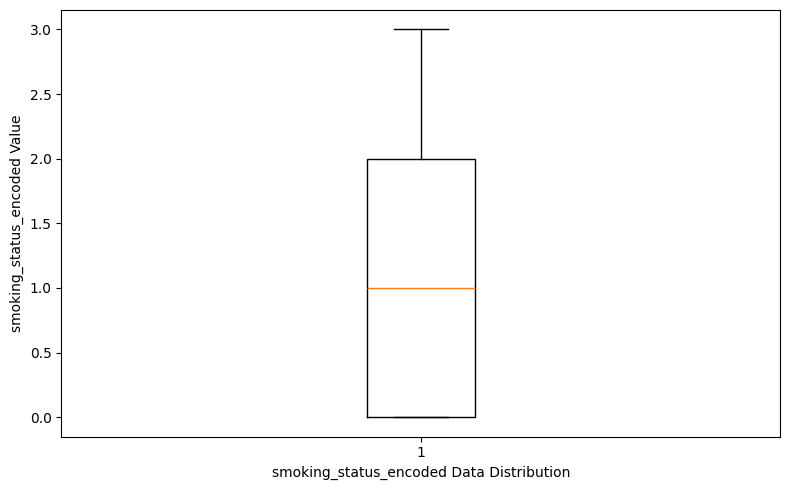

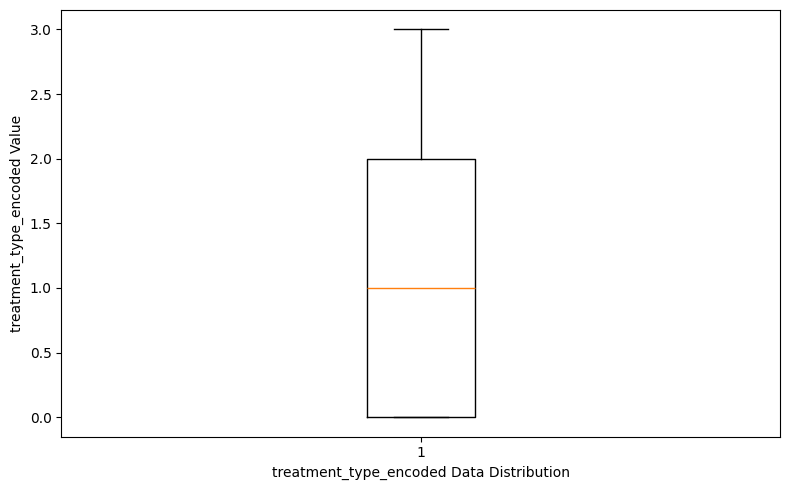

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
lung_dataset._get_numeric_data().columns
#Drop id and age
numeric_columns = [
       'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'survived', 'duration_day',
       'gender_encoded', 'cancer_stage_encoded', 'family_history_encoded',
       'smoking_status_encoded', 'treatment_type_encoded'
]
for i in numeric_columns:
  plt.figure(figsize=(8,5))
  plt.boxplot(lung_dataset[i])
  plt.xlabel(f'{i} Data Distribution')
  plt.ylabel(f"{i} Value")
  plt.tight_layout()
  plt.show()

In [101]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X = lung_dataset.drop(['id','age','country', 'survived', 'start_date', 'end_date'], axis=1)
y = lung_dataset['survived']
X.columns.value_counts().sum()
X.columns

Index(['bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
       'other_cancer', 'duration_day', 'gender_encoded',
       'cancer_stage_encoded', 'family_history_encoded',
       'smoking_status_encoded', 'treatment_type_encoded'],
      dtype='object')

In [102]:
X.sample(3)

,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,duration_day,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
731466,44.3,276,1,0,0,0,291,0,3,0,2,1
135527,41.9,291,1,0,1,1,415,0,3,0,2,2
832048,37.8,245,0,1,0,0,627,1,1,1,2,0


In [103]:
inspect = X.drop(['hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded', 'family_history_encoded', 'smoking_status_encoded', 'treatment_type_encoded'], axis = 1)
inspect.sample(3)

,bmi,cholesterol_level,duration_day
216966,34.5,281,370
667593,19.5,156,383
101340,30.3,276,529


In [104]:
minmax.fit(X.drop(['hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded', 'family_history_encoded', 'smoking_status_encoded', 'treatment_type_encoded'], axis = 1))
X_scaled_raw = minmax.transform(X.drop(['hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded', 'family_history_encoded', 'smoking_status_encoded', 'treatment_type_encoded'], axis = 1))
X_scaled = pd.DataFrame(X_scaled_raw) #bmi = 0, cholesterol_level = 1, duration_day = 2
X_half_set = pd.concat([X_scaled, X[['hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded', 'family_history_encoded', 'smoking_status_encoded', 'treatment_type_encoded']]], axis = 1)
X_half_set.sample(3)

,0,1,2,hypertension,asthma,cirrhosis,other_cancer,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
148566,0.389655,0.60,0.480804,1,0,0,1,0,4,1,3,2
807893,0.755172,0.88,0.566728,1,1,1,0,0,4,0,0,1
481027,0.993103,0.96,0.742230,1,1,0,0,1,2,0,2,2


##Data for Model

In [107]:
X_set = X_half_set.set_axis([
    'bmi', 'cholesterol_level', 'duration_day','hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'gender_encoded',
    'cancer_stage_encoded', 'family_history_encoded', 'smoking_status_encoded', 'treatment_type_encoded'], axis='columns')
X_set.sample(3)
X_set_clipped = X_set.sample(frac=4, replace=True).reset_index(drop=True)[:100000]
X_set_clipped.head(3)

,bmi,cholesterol_level,duration_day,hypertension,asthma,cirrhosis,other_cancer,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
0,0.931034,0.813333,0.246801,1,0,0,1,0,4,0,3,0
1,0.258621,0.453333,0.449726,0,0,0,0,1,2,0,1,2
2,0.324138,0.340000,0.502742,1,0,0,0,0,4,1,3,0


In [108]:
y_clipped = y.sample(frac=4, replace=True).reset_index(drop=True)[:100000]
y_clipped.value_counts()

,count
survived,
0,77996
1,22004


##Model Preparation

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_set_clipped, y_clipped, test_size=0.4, random_state=42)

In [110]:
X_train.head(3)

,bmi,cholesterol_level,duration_day,hypertension,asthma,cirrhosis,other_cancer,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
40507,0.475862,0.466667,0.210238,1,1,0,0,0,4,0,2,3
72707,0.334483,0.040000,0.791590,0,0,0,0,0,3,1,0,1
90912,0.058621,0.400000,0.811700,1,1,1,0,0,2,0,2,3


In [111]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
# Initialize and train the SVC classifier
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_svc))

# Evaluate the classifier
print("SVC Classifier Report:\n", classification_report(y_test, y_pred_svc))

Accuracy Score:
 0.7817
SVC Classifier Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     31268
           1       0.00      0.00      0.00      8732

    accuracy                           0.78     40000
   macro avg       0.39      0.50      0.44     40000
weighted avg       0.61      0.78      0.69     40000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


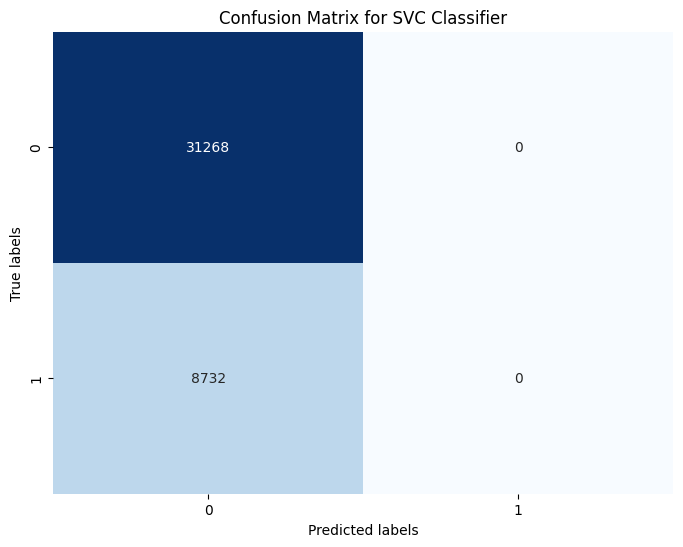

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVC Classifier')
plt.show()

In [120]:
X_set_clipped.columns

Index(['bmi', 'cholesterol_level', 'duration_day', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'gender_encoded', 'cancer_stage_encoded',
       'family_history_encoded', 'smoking_status_encoded',
       'treatment_type_encoded'],
      dtype='object')

In [121]:
X_set_clipped.sample(3)

,bmi,cholesterol_level,duration_day,hypertension,asthma,cirrhosis,other_cancer,gender_encoded,cancer_stage_encoded,family_history_encoded,smoking_status_encoded,treatment_type_encoded
49635,0.234483,0.320000,0.442413,1,0,0,0,1,1,0,3,0
79729,0.144828,0.473333,0.307130,0,0,0,0,0,3,0,3,2
10880,0.979310,0.760000,0.323583,1,0,0,0,0,4,1,2,3


In [117]:
y_clipped.sample(3)

,survived
53795,0
23312,0
85720,1


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Param
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

print("Training model")
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training model

Model Evaluation:
Accuracy: 0.7788707865168539

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    138639
           1       0.00      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.39      0.50      0.44    178000
weighted avg       0.61      0.78      0.68    178000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


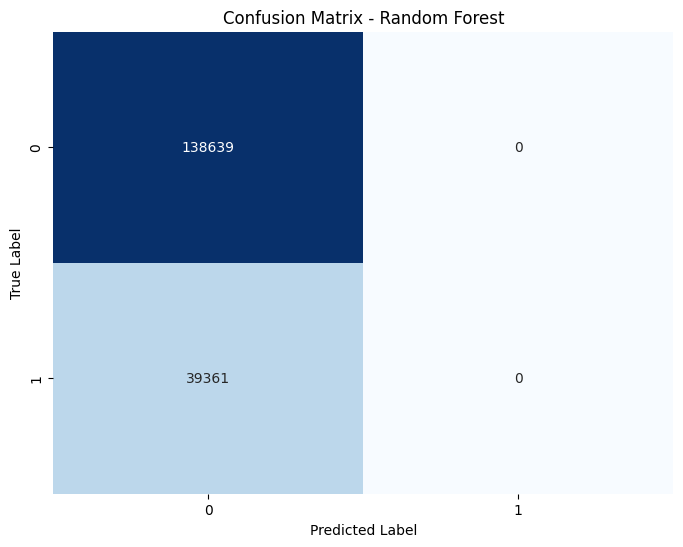

In [127]:
# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Feature ranking:
1. Feature 6 (0.2593)
2. Feature 0 (0.2222)
3. Feature 1 (0.1992)
4. Feature 10 (0.0582)
5. Feature 11 (0.0573)
6. Feature 8 (0.0515)
7. Feature 7 (0.0289)
8. Feature 3 (0.0279)
9. Feature 2 (0.0265)
10. Feature 9 (0.0260)
11. Feature 4 (0.0225)
12. Feature 5 (0.0206)


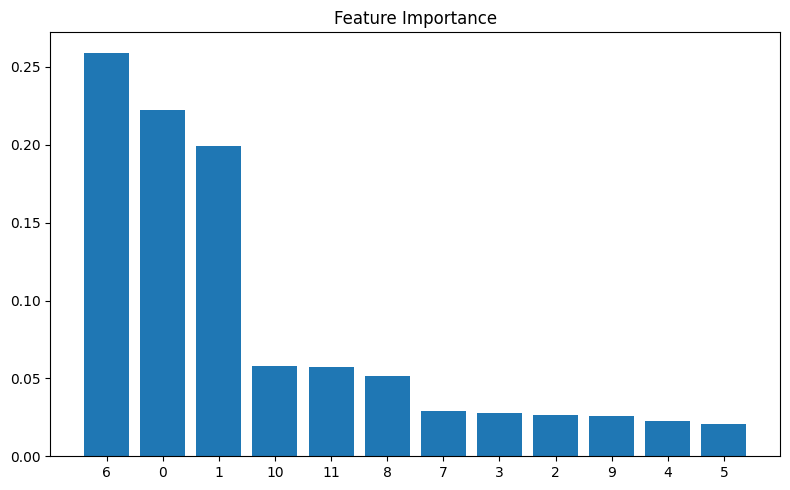

In [129]:
# Feature importance
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f+1}. Feature {indices[f]} ({importances[indices[f]]:.4f})")

plt.figure(figsize=(8, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()